In [31]:
!pip install xgboost

In [162]:
import numpy as np
import pandas as pd
import pickle
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import LinearSVR, SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

In [163]:
df = pd.read_csv('final_data.csv')
df.head(15)

,Dimensions,Blocks,Threads,Time,Speedup,[CUDA memcpy HtoD] Time,[CUDA memcpy HtoD] Avg,[CUDA memcpy HtoD] Min,[CUDA memcpy HtoD] Max,[CUDA memcpy DtoH] Time,[CUDA memcpy DtoH] Avg,[CUDA memcpy DtoH] Min,[CUDA memcpy DtoH] Max,cudaMalloc Time,cudaMalloc Avg,cudaMalloc Min,cudaMalloc Max,cudaMemcpy Time,cudaMemcpy Avg,cudaMemcpy Min,cudaMemcpy Max,cudaFree Time,cudaFree Avg,cudaFree Min,cudaFree Max,Device Name,Compute Capability,Total Global Memory,Shared Memory per Block,Registers per Block,Warp Size,Maximum Threads per Block,Thread Dimension Z,Thread Dimension Y,Thread Dimension X,Grid Size Z,Grid Size Y,Grid Size X,Clock Rate,Total Constant Memory,Multiprocessor Count,integrated,Asynchronous Engine Count,Memory Bus Width,Memory Clock Rate,L2 Cache Size,Maximum Threads per Multiprocessor,Concurrent Kernels,float,unsigned_int,int,num_blocks,num_grid,threads,cudaMalloc,cudaMemcpy,cudaFree,+,for,-,*,/
0,10,1,1,0.04,1.000000,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
1,10,1,2,0.04,1.000000,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
2,10,1,4,0.04,1.000000,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
3,10,1,8,0.03,1.333333,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
4,10,1,16,0.03,1.333333,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
5,10,1,32,0.06,0.666667,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
6,10,1,64,0.04,1.000000,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
7,10,1,128,0.04,1.000000,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.00

In [164]:
df.tail(20)

,Dimensions,Blocks,Threads,Time,Speedup,[CUDA memcpy HtoD] Time,[CUDA memcpy HtoD] Avg,[CUDA memcpy HtoD] Min,[CUDA memcpy HtoD] Max,[CUDA memcpy DtoH] Time,[CUDA memcpy DtoH] Avg,[CUDA memcpy DtoH] Min,[CUDA memcpy DtoH] Max,cudaMalloc Time,cudaMalloc Avg,cudaMalloc Min,cudaMalloc Max,cudaMemcpy Time,cudaMemcpy Avg,cudaMemcpy Min,cudaMemcpy Max,cudaFree Time,cudaFree Avg,cudaFree Min,cudaFree Max,Device Name,Compute Capability,Total Global Memory,Shared Memory per Block,Registers per Block,Warp Size,Maximum Threads per Block,Thread Dimension Z,Thread Dimension Y,Thread Dimension X,Grid Size Z,Grid Size Y,Grid Size X,Clock Rate,Total Constant Memory,Multiprocessor Count,integrated,Asynchronous Engine Count,Memory Bus Width,Memory Clock Rate,L2 Cache Size,Maximum Threads per Multiprocessor,Concurrent Kernels,float,unsigned_int,int,num_blocks,num_grid,threads,cudaMalloc,cudaMemcpy,cudaFree,+,for,-,*,/
7020,7936,1984,2,25.70,3.552529,0.003572,0.001191,0.001134,0.001221,0.001691,0.001691,0.001691,0.001691,0.003207,0.001069,0.000007,0.003191,0.00529,0.001323,0.00114,0.001703,0.000791,0.000264,0.000008,0.000392,NVIDIA GeForce GTX TITAN Z,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0
7021,7936,992,3,12.86,7.099533,0.003572,0.001191,0.001134,0.001221,0.001691,0.001691,0.001691,0.001691,0.003207,0.001069,0.000007,0.003191,0.00529,0.001323,0.00114,0.001703,0.000791,0.000264,0.000008,0.000392,NVIDIA GeForce GTX TITAN Z,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0
7022,7936,496,4,8.74,10.446224,0.003572,0.001191,0.001134,0.001221,0.001691,0.001691,0.001691,0.001691,0.003207,0.001069,0.000007,0.003191,0.00529,0.001323,0.00114,0.001703,0.000791,0.000264,0.000008,0.000392,NVIDIA GeForce GTX TITAN Z,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0
7023,7936,248,5,6.58,13.875380,0.003572,0.001191,0.001134,0.001221,0.001691,0.001691,0.001691,0.001691,0.003207,0.001069,0.000007,0.003191,0.00529,0.001323,0.00114,0.001703,0.000791,0.000264,0.000008,0.000392,NVIDIA GeForce GTX TITAN Z,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0
7024,7936,124,6,0.72,126.805556,0.003572,0.001191,0.001134,0.001221,0.001691,0.001691,0.001691,0.001691,0.003207,0.001069,0.000007,0.003191,0.00529,0.001323,0.00114,0.001703,0.000791,0.000264,0.000008,0.000392,NVIDIA GeForce GTX TITAN Z,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0
7025,7936,62,7,0.59,154.745763,0.003572,0.001191,0.001134,0.001221,0.001691,0.001691,0.001691,0.001691,0.003207,0.001069,0.000007,0.003191,0.00529,0.001323,0.00114,0.001703,0.000791,0.000264,0.000008,0.000392,NVIDIA GeForce GTX TITAN Z,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0
7026,7936,31,8,0.84,108.690476,0.003572,0.001191,0.001134,0.001221,0.001691,0.001691,0.001691,0.001691,0.003207,0.001069,0.000007,0.003191,0.00529,0.001323,0.00114,0.001703,0.000791,0.000264,0.000008,0.000392,NVIDIA GeForce GTX TITAN Z,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0
7027,7936,16,9,0.63,144.920635,0.003572,0.001191,0.001134,0.001221,0.001691,0.001691,0.001691,0.001691,0.003207,0.001069,0.0

In [133]:
df = df.sample(frac=1).reset_index(drop=True)

In [134]:
df.head()

,Dimensions,Blocks,Threads,Time,Speedup,[CUDA memcpy HtoD] Time,[CUDA memcpy HtoD] Avg,[CUDA memcpy HtoD] Min,[CUDA memcpy HtoD] Max,[CUDA memcpy DtoH] Time,[CUDA memcpy DtoH] Avg,[CUDA memcpy DtoH] Min,[CUDA memcpy DtoH] Max,cudaMalloc Time,cudaMalloc Avg,cudaMalloc Min,cudaMalloc Max,cudaMemcpy Time,cudaMemcpy Avg,cudaMemcpy Min,cudaMemcpy Max,cudaFree Time,cudaFree Avg,cudaFree Min,cudaFree Max,Device Name,Compute Capability,Total Global Memory,Shared Memory per Block,Registers per Block,Warp Size,Maximum Threads per Block,Thread Dimension Z,Thread Dimension Y,Thread Dimension X,Grid Size Z,Grid Size Y,Grid Size X,Clock Rate,Total Constant Memory,Multiprocessor Count,integrated,Asynchronous Engine Count,Memory Bus Width,Memory Clock Rate,L2 Cache Size,Maximum Threads per Multiprocessor,Concurrent Kernels,float,unsigned_int,int,num_blocks,num_grid,threads,cudaMalloc,cudaMemcpy,cudaFree,+,for,-,*,/
0,10,13,8,0.03,1.333333,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.001020,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
1,10000,9,1,0.16,1.000000,0.006557,0.002186,0.002182,0.002193,0.002117,0.002117,0.002117,0.002117,0.224750,0.074917,0.000215,0.224311,0.014055,0.003514,0.002920,0.005266,0.001290,0.000430,0.000265,0.000513,NVIDIA GeForce GTX TITAN Z,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
2,100,14,128,0.25,0.920000,0.002337,0.000779,0.000775,0.000786,0.002577,0.002577,0.002577,0.002577,0.333979,0.111326,0.000239,0.333499,0.008094,0.002023,0.000998,0.005065,0.000681,0.000227,0.000178,0.000320,NVIDIA TITAN V,7.0,12356288.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1455000.0,65536.0,80.0,0.0,7.0,3072.0,850000.0,4718592.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
3,100000,3,1024,0.23,1.043478,0.002337,0.000779,0.000775,0.000786,0.002577,0.002577,0.002577,0.002577,0.333979,0.111326,0.000239,0.333499,0.008094,0.002023,0.000998,0.005065,0.000681,0.000227,0.000178,0.000320,NVIDIA TITAN V,7.0,12356288.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1455000.0,65536.0,80.0,0.0,7.0,3072.0,850000.0,4718592.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
4,1000000,13,128,0.11,0.818182,0.002846,0.000949,0.000939,0.000954,0.001219,0.001219,0.001219,0.001219,0.258798,0.086266,0.000202,0.258384,0.007014,0.001753,0.001247,0.003230,0.001063,0.000354,0.000283,0.000390,NVIDIA GeForce GTX TITAN X,5.2,12505984.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1215500.0,65536.0,24.0,0.0,2.0,384.0,3505000.0,3145728.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0


In [135]:
df.columns

Index(['Dimensions', 'Blocks', 'Threads', 'Time', 'Speedup',
       '[CUDA memcpy HtoD] Time', '[CUDA memcpy HtoD] Avg',
       '[CUDA memcpy HtoD] Min', '[CUDA memcpy HtoD] Max',
       '[CUDA memcpy DtoH] Time', '[CUDA memcpy DtoH] Avg',
       '[CUDA memcpy DtoH] Min', '[CUDA memcpy DtoH] Max', 'cudaMalloc Time',
       'cudaMalloc Avg', 'cudaMalloc Min', 'cudaMalloc Max', 'cudaMemcpy Time',
       'cudaMemcpy Avg', 'cudaMemcpy Min', 'cudaMemcpy Max', 'cudaFree Time',
       'cudaFree Avg', 'cudaFree Min', 'cudaFree Max', 'Device Name',
       'Compute Capability', 'Total Global Memory', 'Shared Memory per Block',
       'Registers per Block', 'Warp Size', 'Maximum Threads per Block',
       'Thread Dimension Z', 'Thread Dimension Y', 'Thread Dimension X',
       'Grid Size Z', 'Grid Size Y', 'Grid Size X', 'Clock Rate',
       'Total Constant Memory', 'Multiprocessor Count', 'integrated',
       'Asynchronous Engine Count', 'Memory Bus Width', 'Memory Clock Rate',
       'L2 Cache 

In [136]:
columns = ['Dimensions', 'Blocks', 'Threads', 'Time', 'Speedup',
        '[CUDA memcpy HtoD] Avg',
       '[CUDA memcpy HtoD] Min', '[CUDA memcpy HtoD] Max',
        '[CUDA memcpy DtoH] Avg','[CUDA memcpy DtoH] Min', '[CUDA memcpy DtoH] Max',
       'cudaMalloc Avg', 'cudaMalloc Min', 'cudaMalloc Max', 
       'cudaMemcpy Avg', 'cudaMemcpy Min', 'cudaMemcpy Max', 
       'cudaFree Avg', 'cudaFree Min', 'cudaFree Max', 'Device Name',
       'Compute Capability', 'Total Global Memory', 'Shared Memory per Block',
       'Registers per Block', 'Warp Size', 'Maximum Threads per Block',
       'Thread Dimension Z', 'Thread Dimension Y', 'Thread Dimension X',
       'Grid Size Z', 'Grid Size Y', 'Grid Size X', 'Clock Rate',
       'Total Constant Memory', 'Multiprocessor Count', 'integrated',
       'Asynchronous Engine Count', 'Memory Bus Width', 'Memory Clock Rate',
       'L2 Cache Size', 'Maximum Threads per Multiprocessor',
       'Concurrent Kernels', 'float', 'unsigned_int', 'int', 'num_blocks',
       'num_grid', 'threads', 'cudaMalloc', 'cudaMemcpy', 'cudaFree', '+',
       'for', '-', '*', '/']

In [137]:
df = df[columns]

In [138]:
y = df['Speedup'].values
df.drop(['Speedup', 'Time'], axis = 1, inplace = True)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7040 entries, 0 to 7039
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Dimensions                          7040 non-null   int64  
 1   Blocks                              7040 non-null   int64  
 2   Threads                             7040 non-null   int64  
 3   [CUDA memcpy HtoD] Avg              7040 non-null   float64
 4   [CUDA memcpy HtoD] Min              7040 non-null   float64
 5   [CUDA memcpy HtoD] Max              7040 non-null   float64
 6   [CUDA memcpy DtoH] Avg              7040 non-null   float64
 7   [CUDA memcpy DtoH] Min              7040 non-null   float64
 8   [CUDA memcpy DtoH] Max              7040 non-null   float64
 9   cudaMalloc Avg                      7040 non-null   float64
 10  cudaMalloc Min                      7040 non-null   float64
 11  cudaMalloc Max                      7040 no

In [140]:
df['Device Name'].unique().tolist()

['NVIDIA GeForce GTX TITAN Black',
 'NVIDIA GeForce GTX TITAN Z',
 'NVIDIA TITAN V',
 'NVIDIA GeForce GTX TITAN X',
 'NVIDIA GeForce RTX 2080 Ti']

In [141]:
oe = OrdinalEncoder()
gpus = oe.fit_transform(df['Device Name'].values.reshape(-1, 1))

In [142]:
df['Device Name'] = gpus

In [143]:
df.head()

,Dimensions,Blocks,Threads,[CUDA memcpy HtoD] Avg,[CUDA memcpy HtoD] Min,[CUDA memcpy HtoD] Max,[CUDA memcpy DtoH] Avg,[CUDA memcpy DtoH] Min,[CUDA memcpy DtoH] Max,cudaMalloc Avg,cudaMalloc Min,cudaMalloc Max,cudaMemcpy Avg,cudaMemcpy Min,cudaMemcpy Max,cudaFree Avg,cudaFree Min,cudaFree Max,Device Name,Compute Capability,Total Global Memory,Shared Memory per Block,Registers per Block,Warp Size,Maximum Threads per Block,Thread Dimension Z,Thread Dimension Y,Thread Dimension X,Grid Size Z,Grid Size Y,Grid Size X,Clock Rate,Total Constant Memory,Multiprocessor Count,integrated,Asynchronous Engine Count,Memory Bus Width,Memory Clock Rate,L2 Cache Size,Maximum Threads per Multiprocessor,Concurrent Kernels,float,unsigned_int,int,num_blocks,num_grid,threads,cudaMalloc,cudaMemcpy,cudaFree,+,for,-,*,/
0,10,13,8,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.059715,0.000112,0.178915,0.001020,0.000525,0.002445,0.000313,0.000156,0.000394,0.0,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
1,10000,9,1,0.002186,0.002182,0.002193,0.002117,0.002117,0.002117,0.074917,0.000215,0.224311,0.003514,0.002920,0.005266,0.000430,0.000265,0.000513,2.0,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
2,100,14,128,0.000779,0.000775,0.000786,0.002577,0.002577,0.002577,0.111326,0.000239,0.333499,0.002023,0.000998,0.005065,0.000227,0.000178,0.000320,4.0,7.0,12356288.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1455000.0,65536.0,80.0,0.0,7.0,3072.0,850000.0,4718592.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
3,100000,3,1024,0.000779,0.000775,0.000786,0.002577,0.002577,0.002577,0.111326,0.000239,0.333499,0.002023,0.000998,0.005065,0.000227,0.000178,0.000320,4.0,7.0,12356288.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1455000.0,65536.0,80.0,0.0,7.0,3072.0,850000.0,4718592.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
4,1000000,13,128,0.000949,0.000939,0.000954,0.001219,0.001219,0.001219,0.086266,0.000202,0.258384,0.001753,0.001247,0.003230,0.000354,0.000283,0.000390,1.0,5.2,12505984.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1215500.0,65536.0,24.0,0.0,2.0,384.0,3505000.0,3145728.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0


In [144]:
with open('utils/gpu_encoder.pickle', 'wb') as ge:
    pickle.dump(oe, ge)

/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

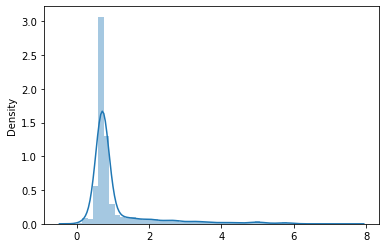

In [145]:
sns.distplot(np.log1p(y))

In [146]:
df.head()

,Dimensions,Blocks,Threads,[CUDA memcpy HtoD] Avg,[CUDA memcpy HtoD] Min,[CUDA memcpy HtoD] Max,[CUDA memcpy DtoH] Avg,[CUDA memcpy DtoH] Min,[CUDA memcpy DtoH] Max,cudaMalloc Avg,cudaMalloc Min,cudaMalloc Max,cudaMemcpy Avg,cudaMemcpy Min,cudaMemcpy Max,cudaFree Avg,cudaFree Min,cudaFree Max,Device Name,Compute Capability,Total Global Memory,Shared Memory per Block,Registers per Block,Warp Size,Maximum Threads per Block,Thread Dimension Z,Thread Dimension Y,Thread Dimension X,Grid Size Z,Grid Size Y,Grid Size X,Clock Rate,Total Constant Memory,Multiprocessor Count,integrated,Asynchronous Engine Count,Memory Bus Width,Memory Clock Rate,L2 Cache Size,Maximum Threads per Multiprocessor,Concurrent Kernels,float,unsigned_int,int,num_blocks,num_grid,threads,cudaMalloc,cudaMemcpy,cudaFree,+,for,-,*,/
0,10,13,8,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.059715,0.000112,0.178915,0.001020,0.000525,0.002445,0.000313,0.000156,0.000394,0.0,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
1,10000,9,1,0.002186,0.002182,0.002193,0.002117,0.002117,0.002117,0.074917,0.000215,0.224311,0.003514,0.002920,0.005266,0.000430,0.000265,0.000513,2.0,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
2,100,14,128,0.000779,0.000775,0.000786,0.002577,0.002577,0.002577,0.111326,0.000239,0.333499,0.002023,0.000998,0.005065,0.000227,0.000178,0.000320,4.0,7.0,12356288.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1455000.0,65536.0,80.0,0.0,7.0,3072.0,850000.0,4718592.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
3,100000,3,1024,0.000779,0.000775,0.000786,0.002577,0.002577,0.002577,0.111326,0.000239,0.333499,0.002023,0.000998,0.005065,0.000227,0.000178,0.000320,4.0,7.0,12356288.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1455000.0,65536.0,80.0,0.0,7.0,3072.0,850000.0,4718592.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
4,1000000,13,128,0.000949,0.000939,0.000954,0.001219,0.001219,0.001219,0.086266,0.000202,0.258384,0.001753,0.001247,0.003230,0.000354,0.000283,0.000390,1.0,5.2,12505984.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1215500.0,65536.0,24.0,0.0,2.0,384.0,3505000.0,3145728.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0


In [147]:
X = df.values

In [148]:
df.columns

Index(['Dimensions', 'Blocks', 'Threads', '[CUDA memcpy HtoD] Avg',
       '[CUDA memcpy HtoD] Min', '[CUDA memcpy HtoD] Max',
       '[CUDA memcpy DtoH] Avg', '[CUDA memcpy DtoH] Min',
       '[CUDA memcpy DtoH] Max', 'cudaMalloc Avg', 'cudaMalloc Min',
       'cudaMalloc Max', 'cudaMemcpy Avg', 'cudaMemcpy Min', 'cudaMemcpy Max',
       'cudaFree Avg', 'cudaFree Min', 'cudaFree Max', 'Device Name',
       'Compute Capability', 'Total Global Memory', 'Shared Memory per Block',
       'Registers per Block', 'Warp Size', 'Maximum Threads per Block',
       'Thread Dimension Z', 'Thread Dimension Y', 'Thread Dimension X',
       'Grid Size Z', 'Grid Size Y', 'Grid Size X', 'Clock Rate',
       'Total Constant Memory', 'Multiprocessor Count', 'integrated',
       'Asynchronous Engine Count', 'Memory Bus Width', 'Memory Clock Rate',
       'L2 Cache Size', 'Maximum Threads per Multiprocessor',
       'Concurrent Kernels', 'float', 'unsigned_int', 'int', 'num_blocks',
       'num_grid', 'th

In [149]:
#sc = RobustScaler()
sc = MinMaxScaler()
X_scaled = sc.fit_transform(X)

In [150]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size = 0.1, random_state = 42)

In [151]:
def evaluate_model(model, X_train, y_train, X_val, y_val, metric='R2'):
    model.fit(X_train, y_train)
    if metric == 'RMSE':
        y_pred_train = model.predict(X_train)
        print('Training RMSE score = {}'.format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
        y_pred = model.predict(X_val)
        print('Validation RMSE score = {}'.format(np.sqrt(mean_squared_error(y_val, y_pred))))
    else:
        print('Training R2 score = {}'.format(model.score(X_train, y_train)))
        print('Validation R2 score = {}'.format(model.score(X_val, y_val)))

In [152]:
lr = LinearRegression()
evaluate_model(lr, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 35.13433552811348
Validation RMSE score = 27.688184351999237


In [153]:
lasso = Lasso()
evaluate_model(lasso, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 37.509155602815795
Validation RMSE score = 31.53135139279071


In [154]:
ridge = Ridge()
evaluate_model(ridge, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 36.45411105118529
Validation RMSE score = 29.837858844222122


In [155]:
svr = SVR()
evaluate_model(svr, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 39.09587108505987
Validation RMSE score = 33.59595356862843


In [156]:
lsvr = LinearSVR()
evaluate_model(lsvr, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 39.33020679356133
Validation RMSE score = 33.94032742573231


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [157]:
xgb = XGBRegressor(n_estimators = 150)
evaluate_model(xgb, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 0.44774640451896086
Validation RMSE score = 5.086545975377378


In [158]:
mlp = MLPRegressor(hidden_layer_sizes=(320,5))
evaluate_model(mlp, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 31.296807802661046
Validation RMSE score = 22.348261574740807


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [159]:
rfr = RandomForestRegressor(n_estimators = 200, max_depth = 15)
evaluate_model(rfr, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 10.038145025848795
Validation RMSE score = 4.554081342128272


In [125]:
with open('random_forest_model.pickle', 'wb') as f:
    pickle.dump(rfr, f)

In [126]:
with open('utils/min_max_scaler.pickle', 'wb') as f:
    pickle.dump(sc, f)

In [ ]:
y_pred = rfr.predict(X_val)

In [ ]:
y_pred[10]

In [ ]:
y_val[10]

In [ ]:
rfe = RFE(rfr)
rfe = rfe.fit(X_train, y_train)
columns = [df.columns.tolist()[i] for i in range(len(df.columns.tolist())) if rfe.support_[i]]

In [ ]:
columns

In [ ]:
tdf = df[columns]

In [ ]:
X_new = sc.fit_transform(tdf.values)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_new, y, test_size = 0.225, random_state = 42)

In [ ]:
rfr = RandomForestRegressor(n_estimators = 300)
evaluate_model(rfr, X_train, y_train, X_val, y_val, 'RMSE')

In [ ]:
xgb = XGBRegressor(n_estimators = 500)
evaluate_model(xgb, X_train, y_train, X_val, y_val, 'RMSE')

In [ ]:
y_pred = xgb.predict(X_val)

In [ ]:
y_pred[10]

In [ ]:
y_val[10]

In [ ]:
y_pred = rfr.predict(X_val)

In [ ]:
y_pred[10]

In [ ]:
y_val[10]